# Описание проекта

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого SQL запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего SQL запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

** 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего SQL запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

# Содержание:   
#### 1. [Аналитика](#Аналитика)
#### 2. [Проверка гипотезы](#Проверка-гипотезы)

# 1. Аналитика <a name="Аналитика"></a>

In [1]:
import sys; print(sys.version)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from IPython.display import display

from sklearn.metrics import roc_auc_score, roc_curve

import warnings
warnings.simplefilter("ignore")

3.7.6 | packaged by conda-forge | (default, Jun  1 2020, 18:57:50) 
[GCC 7.5.0]


#### Загружаем данные, делаем первый взгляд на данные запросов:

In [2]:
#загрузим информацию по моделям сомалетов
model = pd.read_csv('/datasets/query_1.csv')
display(model)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
#загрузим информацию по городам
city = pd.read_csv('/datasets/query_3.csv')
display(city)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


#### Проверяем тип данных на корректность:

In [4]:
display(model.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

In [5]:
display(city.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

#### Вывод: типы данных корректные

#### Изучим данных каждой выборки:

In [6]:
display(model.describe())

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [7]:
display(city.describe())

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


#### Вывод: 
В данных по среднему количеству рейсов в день по городам имеются города, в которых наблюадется заметный перевес по количеству рейсов. Пустых строк нет, нулевых значений по количеству рейсов в двух выборках нет

#### Выберес топ-10 городов по количеству рейсов

In [9]:
rate_city = city.sort_values(by = 'average_flights', ascending=False).reset_index(drop=True).loc[:9]
display(rate_city)

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


#### Строим графики

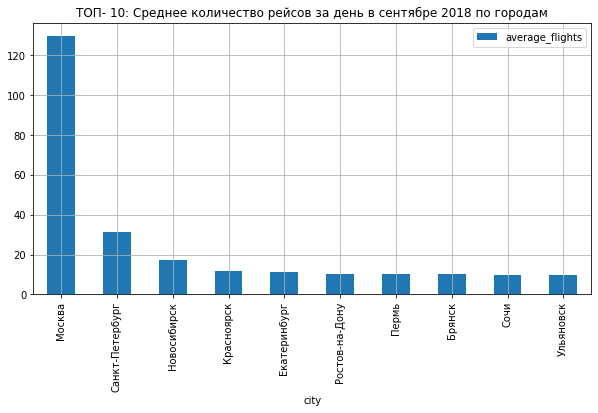

In [11]:
rate_city.plot(x = 'city', y = 'average_flights', kind = 'bar', grid = True, figsize = (10, 5))
plt.title('ТОП- 10: Среднее количество рейсов за день в сентябре 2018 по городам')

plt.show()

#### Вывод: 
Москва - лидер по количеству принимаемых рейсов. Возможно, так как этот город является транзитным для длинных перелетов. Разницу в среднем количестве рейсов также можно рассматривать в разрезе численности населения городов и количества туристических зон

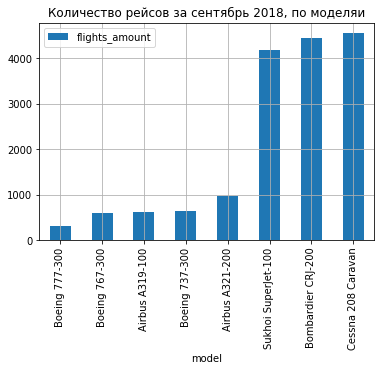

In [18]:
model.sort_values(by='flights_amount').plot(x = 'model', y = 'flights_amount', kind = 'bar', grid = True)
plt.title('Количество рейсов за сентябрь 2018, по моделяи')

plt.show()

#### Вывод: 
Чем меньше количество мест в самолете, тем эта модель имела меньше рейсов. Возможно данная тенденция связана с техническими характеристиками (например, максимальное расстояние перелета). Например, Сessna 208A Caravan вместительностью 13 человек в основном используется на багамских остравах и предназначена для местных перевозок между островами, таких коротких рейсов можно сделать намного больше, чем с помощью гиганта BOEING, на который необходимо набрать от 200 до 500 человек для полной заполняемости и которые летают на более длинные дистанции, а значит и количество перелетов в промежуток времени не может быть больше, чем у небольших самолетов.

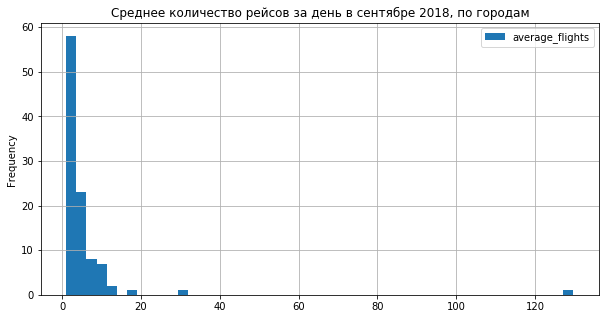

In [12]:
city.plot(x = 'city', y = 'average_flights', kind = 'hist', grid = True, figsize = (10, 5), bins = 50)
plt.title('Среднее количество рейсов за день в сентябре 2018, по городам')

plt.show()

#### Вывод: 
Наиболее распространены города со средним количеством рейсов от 2 до 5 в день.

# 2. Проверка гипотезы <a name="Проверка-гипотезы"></a>

In [13]:
#загрузим и посмотрим на имеющиеся данные
festivals = pd.read_csv('/datasets/query_last.csv')
display(festivals)

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [14]:
#рассортируем недели (выделим 1 - как те, в которым был фестиваль, 0 - в которых небыло)
festivals['festival_week'] = festivals['festival_week'].fillna(0)
def fest_done(row):
    if row == 0:
        return 0
    else:
        return 1
festivals['festival_done'] = festivals['festival_week'].apply(fest_done)
display(festivals)

,week_number,ticket_amount,festival_week,festival_name,festival_done
0,30,43568,30.0,Park Live,1
1,31,51034,31.0,Пикник Афиши,1
2,32,51675,0.0,NaN,0
3,33,51378,0.0,NaN,0
4,34,51492,0.0,NaN,0
5,35,51360,0.0,NaN,0
6,36,51386,36.0,Видфест,1
7,37,51670,0.0,NaN,0
8,38,51518,0.0,NaN,0
9,39,51623,0.0,NaN,0


In [15]:
#посчитаем статистики для по билетам

#таблица для выводы статистик
statistics = (
    {'Statistics':
     ['Средненедельный спрос билетов', 'Дисперсия', 'Стандартное отклонение'],
     'В дни фестивалей': [0,0,0],
     'В обычные дни': [0,0,0]}
)
fest_statistic = pd.DataFrame(statistics)

#выборки по фестивальным неделям
fest_done_1 = (
    festivals.query('festival_done == 1')
    .loc[:, ['ticket_amount']]
    .sort_values(by='ticket_amount')
)

fest_done_0 = (
    festivals.query('festival_done == 0')
    .loc[:, ['ticket_amount']]
    .sort_values(by='ticket_amount')
)
display(fest_statistic, fest_done_1, fest_done_0)

,Statistics,В дни фестивалей,В обычные дни
0,Средненедельный спрос билетов,0,0
1,Дисперсия,0,0
2,Стандартное отклонение,0,0


,ticket_amount
0,43568
1,51034
6,51386


,ticket_amount
5,51360
3,51378
4,51492
8,51518
9,51623
7,51670
2,51675


In [16]:
#функция для расчета статистик
def parameters_s(data_1, data_2):
    if data_1 == 'Средненедельный спрос билетов':
        return (data_2['ticket_amount'].mean()).round(2)
    if data_1 == 'Дисперсия':
        return (np.var(data_2['ticket_amount'], ddof = 1)).round(2)
    if data_1 == 'Стандартное отклонение':
        return (np.std(data_2['ticket_amount'], ddof = 1)).round(2)
    
    
fest_statistic['В дни фестивалей'] = fest_statistic['Statistics'].apply(parameters_s, args = [fest_done_1])
fest_statistic['В обычные дни'] = fest_statistic['Statistics'].apply(parameters_s, args = [fest_done_0])
fest_statistic.columns = pd.MultiIndex.from_product([['Статистики спроса на билеты'], fest_statistic.columns])
fest_statistic

Статистики спроса на билеты                               
                      Statistics В дни фестивалей В обычные дни
0  Средненедельный спрос билетов         48662.67      51530.86
1                      Дисперсия      19497697.33      17143.48
2         Стандартное отклонение          4415.62        130.93

В связи с малым количеством данных, десперсия в дни фестивалей получилась очень большой.

#### Формулируем нулевую гипотезу: Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время


Если нулевая (требуемая) гипотеза будет отвергнута, то будет подтверждена альтернативная гипотеза о неравенстве спросов.

В качестве критерия значимости будем использовать непараметрический критерий Манна-Уитни – критерий значимости, который для проверки статистических гипотез не использует предположений о распределении генеральной совокупности. Критерий Манна-Уитни позволяет выявлять различия между малыми выборками, как в нашем случае

In [17]:
#производим проверку нулевой гипотезы
alpha = 0.01 #уровень значимости
results = st.mannwhitneyu(
    fest_done_0['ticket_amount'],
    fest_done_1['ticket_amount']
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.03412374418900064
Не получилось отвергнуть нулевую гипотезу


### Вывод
Нулевая гипотеза о равенстве спроса на билеты в недели фестивалей и без них не опровергнута. Мной был взят уровень значимости равный 1% для большей точности. А лучше сделать выводы имея больше данных)